<h3>Imports</h3>

In [1]:
import pandas as pd
import numpy as np
import text_preprocessing as tp
import tensorflow as tf
from tensorflow import keras
from keras import layers

if sys.version_info[0] == 3 and sys.version_info[1] == 10:
    from keras.preprocessing.sequence import pad_sequences
else:
    from keras.utils import pad_sequences


<h3>Hyperparameters</h3>

In [2]:
vocab_size = 500
embedding_dim = 16
max_length = 50
padding_type = 'post'
truncate_type = 'post'

<h3>Read and split data</h3>

In [3]:
df = pd.read_csv('combined_data.csv')
(x_train, y_train), (x_val, y_val) = tp.split_data(df, 0.8, 'text', 'sentiment')

<h2>Without using sub words</h2>
<h3>Preprocess data</h3>

In [4]:
tokenizer, word_index = tp.text_tokenizer(x_train, vocab_size=vocab_size)

In [5]:
padded_train = tp.preprocess(text=x_train, text_tokenizer=tokenizer, max_length=max_length, padding_type=padding_type, trunc_type=truncate_type)
padded_val = tp.preprocess(text=x_val, text_tokenizer=tokenizer, max_length=max_length, padding_type=padding_type, trunc_type=truncate_type)

<h3>Create, compile and train model</h3>

In [6]:
def sentiment_classifier():
    model = keras.Sequential(
    [
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        layers.GlobalAveragePooling1D(),
        layers.Dense(6, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
    )
    return model

In [7]:
model = sentiment_classifier()

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [8]:
num_epochs = 30
history = model.fit(padded_train, y_train, epochs=num_epochs, validation_data=(padded_val, y_val), verbose=1)

Epoch 1/30
50/50 [==============================] - 3s 15ms/step - loss: 0.6928 - accuracy: 0.5204 - val_loss: 0.6939 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5223 - val_loss: 0.6945 - val_accuracy: 0.4160
Epoch 3/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5518 - val_loss: 0.6930 - val_accuracy: 0.4436
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.6020 - val_loss: 0.6870 - val_accuracy: 0.7218
Epoch 5/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.6466 - val_loss: 0.6853 - val_accuracy: 0.5990
Epoch 6/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.6987 - val_loss: 0.6785 - val_accuracy: 0.6466
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.7433 - val_loss: 0.6644 - val_accuracy: 0.7168
Epoch 8/30
50/50 [=

<h3>Debbuging</h3>

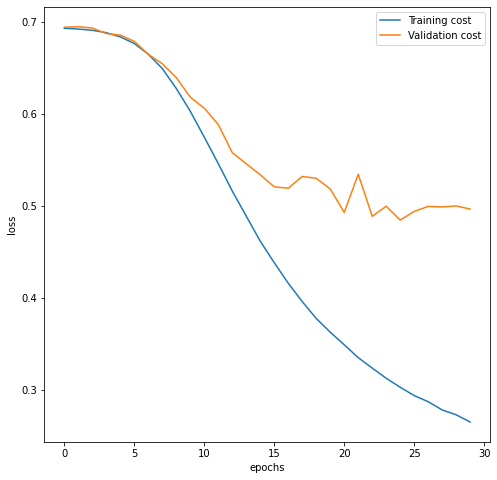

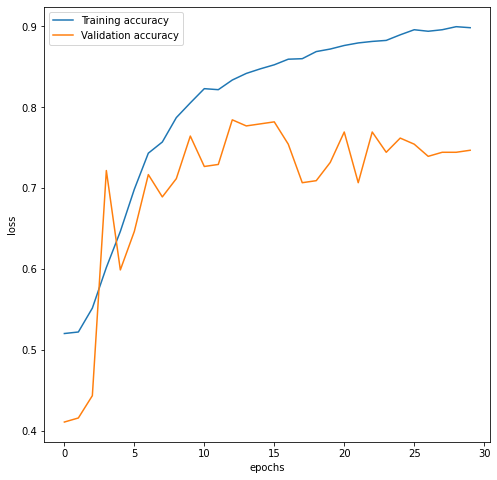

In [9]:
import debbuging_tools as dbt

dbt.learning_curve(history.history, figsize=(8, 8))

<h3>Save embedding vectors and metadata (vocabulary)</h3>

In [10]:
path_1 = './model_1'
reverse_word_index = tp.reversed_word_index(word_index)
tp.save_embeddings(path_1, 0, model=model, reverse_word_index=reverse_word_index, vocab_size=vocab_size, tokenizer=tokenizer)

(500, 16)


<h3>Make predictions</h3>

In [11]:
sentence=['That\'s fine']

new_padded = tp.preprocess(sentence, text_tokenizer=tokenizer, max_length=max_length)
probability = model.predict(new_padded)

print(probability)

1/1 [==============================] - 0s 291ms/step
[[0.74991286]]


<h2>By using sub words</h2>

In [12]:
token_2 = tp.text_tokenizer(x_train, vocab_size=vocab_size, max_subword_length=5)

In [13]:
padded_train_2 = tp.preprocess(text=x_train, text_tokenizer=tokenizer, max_length=max_length, padding_type=padding_type, trunc_type=truncate_type)
padded_val_2 = tp.preprocess(text=x_val, text_tokenizer=tokenizer, max_length=max_length, padding_type=padding_type, trunc_type=truncate_type)

In [14]:
num = 5
encoded = token_2.encode(x_train[5])
print(x_train[num])
# Separately print out each subword, decoded
print(encoded)
for i in encoded:
  print(token_2.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[7, 97, 11, 354, 353, 351, 351, 32, 280, 1, 215, 365, 351, 280, 11, 43, 6, 15, 11, 44, 21, 280, 196, 280, 46, 189, 11, 43, 6, 12, 61, 60, 280, 366, 183, 365, 78, 294]
I 
have 
to 
j
i
g
g
le
 
the 
pl
u
g
 
to 
ge
t 
it 
to 
li
ne
 
up
 
ri
ght 
to 
ge
t 
de
ce
nt
 
v
ol
u
me
.


In [15]:
model_2 = sentiment_classifier()

model_2.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [16]:
history_2 = model.fit(padded_train_2, y_train, epochs=num_epochs, validation_data=(padded_val_2, y_val), verbose=1)

Epoch 1/30
50/50 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.9014 - val_loss: 0.4871 - val_accuracy: 0.7769
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9021 - val_loss: 0.5386 - val_accuracy: 0.7193
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.9065 - val_loss: 0.5054 - val_accuracy: 0.7494
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.9071 - val_loss: 0.4956 - val_accuracy: 0.7744
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.9096 - val_loss: 0.5143 - val_accuracy: 0.7444
Epoch 6/30
50/50 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.9071 - val_loss: 0.5195 - val_accuracy: 0.7393
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9096 - val_loss: 0.5194 - val_accuracy: 0.7494
Epoch 8/30
50/50 [==

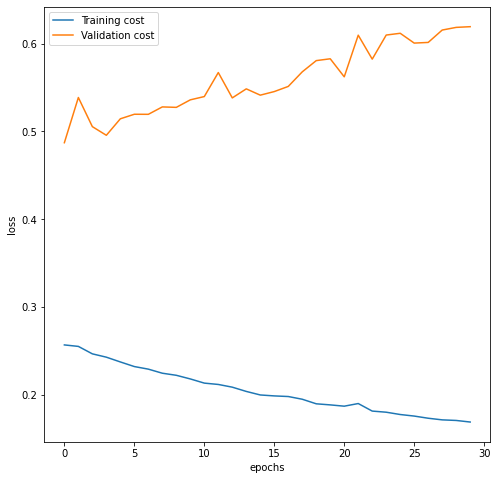

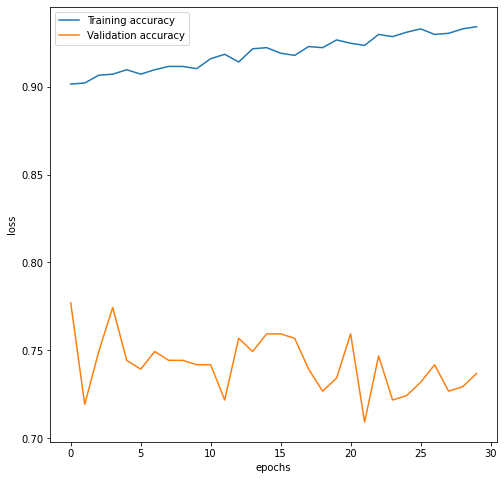

In [17]:
dbt.learning_curve(history_2.history, figsize=(8, 8))

In [18]:
path_2 = './model_2'
tp.save_embeddings(path_2, 0, model=model_2, vocab_size=vocab_size, tokenizer=token_2)

(500, 16)


<h2>With LSTMs</h2>

In [19]:
def model_3():
    model = keras.Sequential(
        [
            layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
            layers.Bidirectional(layers.LSTM(embedding_dim)),
            layers.Dense(6, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]
    )

    return model

In [21]:
def model_3_multiple_lstm():
    model = keras.Sequential(
        [
            layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
            layers.Bidirectional(layers.LSTM(embedding_dim, return_sequences=True)),
            layers.Bidirectional(layers.LSTM(embedding_dim)),
            layers.Dense(6, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]
    )

    return model

In [24]:
def compile_fit_model(model, x_train, y_train, val_set, epochs):
    model.compile(
        optimizer = keras.optimizers.Adam(),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = ['accuracy']
    )

    history = model.fit(x_train, y_train, epochs=epochs, validation_data=val_set, verbose=1)

    return model, history


In [25]:
model3 = model_3()
model3, history3 = compile_fit_model(model3, padded_train, y_train, (padded_val, y_val), 30)

Epoch 1/30
50/50 [==============================] - 12s 82ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6912 - val_accuracy: 0.6216
Epoch 2/30
50/50 [==============================] - 2s 44ms/step - loss: 0.6887 - accuracy: 0.6604 - val_loss: 0.6786 - val_accuracy: 0.6742
Epoch 3/30
50/50 [==============================] - 2s 43ms/step - loss: 0.6365 - accuracy: 0.7150 - val_loss: 0.5830 - val_accuracy: 0.7444
Epoch 4/30
50/50 [==============================] - 2s 44ms/step - loss: 0.4735 - accuracy: 0.8293 - val_loss: 0.5155 - val_accuracy: 0.7368
Epoch 5/30
50/50 [==============================] - 2s 43ms/step - loss: 0.3383 - accuracy: 0.8625 - val_loss: 0.4988 - val_accuracy: 0.7569
Epoch 6/30
50/50 [==============================] - 3s 51ms/step - loss: 0.2754 - accuracy: 0.8883 - val_loss: 0.5027 - val_accuracy: 0.7719
Epoch 7/30
50/50 [==============================] - 2s 43ms/step - loss: 0.2439 - accuracy: 0.8989 - val_loss: 0.5394 - val_accuracy: 0.7494
Epoch 8/30
5

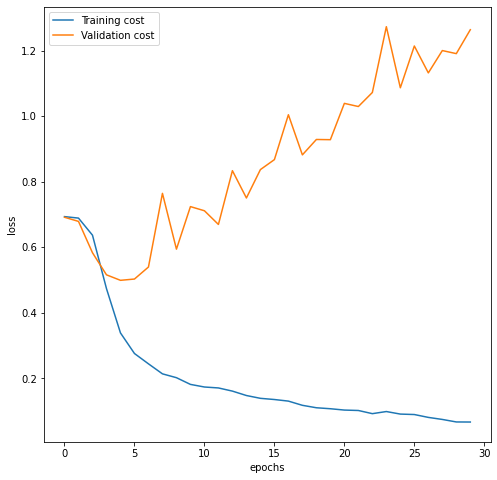

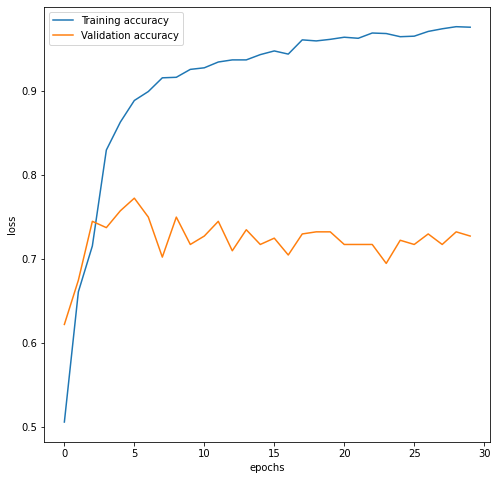

In [26]:
dbt.learning_curve(history3.history, figsize=(8, 8))


In [27]:
model3_m = model_3_multiple_lstm()
model3_m, history3_m = compile_fit_model(model3_m, padded_train, y_train, (padded_val, y_val), 30)

Epoch 1/30
50/50 [==============================] - 17s 139ms/step - loss: 0.6913 - accuracy: 0.5198 - val_loss: 0.6942 - val_accuracy: 0.4812
Epoch 2/30
50/50 [==============================] - 4s 88ms/step - loss: 0.6121 - accuracy: 0.6924 - val_loss: 0.5227 - val_accuracy: 0.7719
Epoch 3/30
50/50 [==============================] - 5s 100ms/step - loss: 0.4033 - accuracy: 0.8399 - val_loss: 0.6813 - val_accuracy: 0.6967
Epoch 4/30
50/50 [==============================] - 4s 85ms/step - loss: 0.3199 - accuracy: 0.8770 - val_loss: 0.4820 - val_accuracy: 0.7794
Epoch 5/30
50/50 [==============================] - 4s 88ms/step - loss: 0.3006 - accuracy: 0.8795 - val_loss: 0.4816 - val_accuracy: 0.7619
Epoch 6/30
50/50 [==============================] - 5s 91ms/step - loss: 0.2944 - accuracy: 0.8914 - val_loss: 0.5298 - val_accuracy: 0.7644
Epoch 7/30
50/50 [==============================] - 4s 82ms/step - loss: 0.2895 - accuracy: 0.8958 - val_loss: 0.6025 - val_accuracy: 0.7093
Epoch 8/30

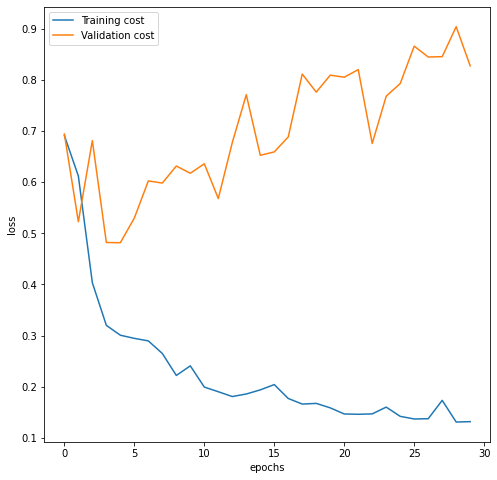

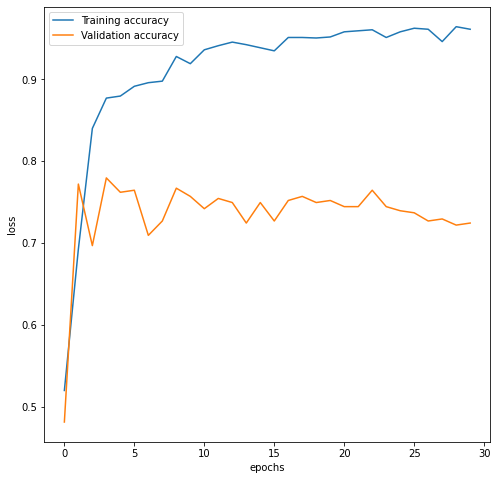

In [28]:
dbt.learning_curve(history3_m.history, figsize=(8, 8))